## 📂 Seaborn

**Matplotlib의 기능에 스타일을 확장한 파이썬 시각화 도구**이다.<br>
Seaborn을 사용하기 위해서는 Matplotlib가 import 되어 있어야 한다.<br>
스타일 색상을 지원하기 위해서 파렛트를 지원한다.<br>
그래프는 대부분 Matplotlib에 있는 것을 사용하고 Seaborn이 몇 개의 추가적인 그래프를 가지고 있다.

---

## 📂 Seaborn 스타일링

1. sns.set_style()
    - background color · grid · spine · tick을 정의하여 그래프의 전반적인 모양을 스타일링
    - Built-in Themes 활용하기
        - Seaborn에는 5가지 기본 제공 테마가 있다.
        - darkgrid(디폴트 값) · whitegrid · dark · white · ticks
    
2. sns.set_context()
    - 프레젠테이션 또는 보고서와 같은 다양한 매체에 활용할 수 있도록 스타일링
    - paper, notebook(디폴트 값), talk, poster
    - 스케일로도 전반적인 사이즈를 조정할 수 있지만 실제 폰트 크기를 조정하는 파라미터는 별도로 있다. (font_scale 파라미터)
    
3. sns.despine()
    - 축선의 표시 여부를 결정하는 함수
    - right = True/False · left = True/False · top = True/False · bottom = True/False
    - True이면 표시하지 않는다
    - False이면 표시한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
import seaborn as sns

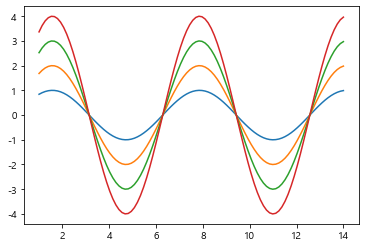

In [2]:
x = np.linspace(1, 14, 100) # 1 ~ 14까지의 범위에서 동일 간격의 숫자 100개 생성
y1 = np.sin(x)
y2 = 2 * np.sin(x)
y3 = 3 * np.sin(x)
y4 = 4 * np.sin(x)

plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

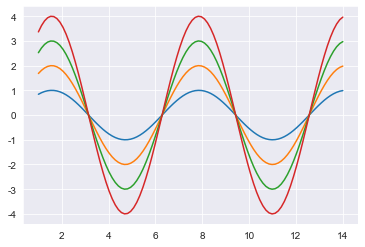

In [3]:
sns.set_style('darkgrid')
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

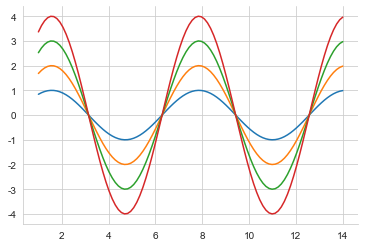

In [4]:
sns.set_style('whitegrid')
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine(right=True, left=False, top=True, bottom=False)
plt.show()

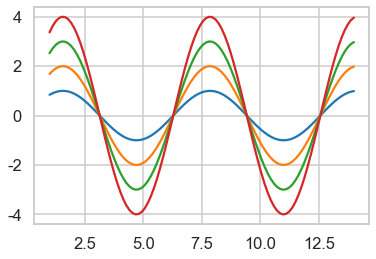

In [5]:
sns.set_context('talk') # notebook, talk, paper, poster
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

---

## 📂 Distribution Plot

Distribution Plot은 데이터의 분포를 시각화하는데 도움이 된다.<br>
이 그래프를 사용하여 데이터의 평균(mean) · 중위수(median) · 범위(range) · 분산(variance) · 편차(deviation) 등을 이해할 수 있다.

#### 데이터 셋 준비

In [6]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Hist Plot

변수에 대한 히스토그램을 표시한다.<br>
하나 혹은 두 개의 변수 분포를 나타내는 전형적인 시각화 도구로 범위에 포함되는 관측수를 세어 표시한다.

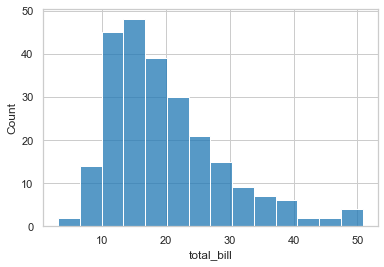

In [7]:
sns.set_context('notebook')
sns.histplot(x=tips['total_bill'])
plt.show()

#### KDE Plot

하나 혹은 두 개의 변수에 대한 분포를 그린다.<br>
Hist Plot이 절대량이라면 KDE Plot은 밀도 추정치를 시각화한다.

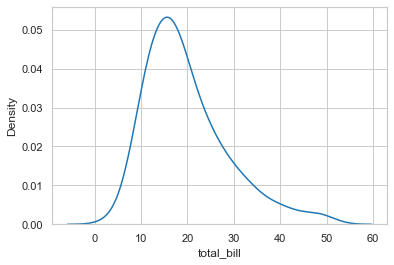

In [8]:
sns.kdeplot(x=tips['total_bill'])
plt.show()

#### Box Plot

최대(max) · 최소(min) · 평균(mean) · 1 사분위수(first quartile) · 3 사분위수(third quartile)를 보기 위한 그래프<br>
특이치(outliar)를 발견하기에도 유용하다.<br>
단일 연속형 변수에 대해 수치를 표시하거나 연속형 변수를 기반으로 서로 다른 범주형 변수를 분석할 수 있다.

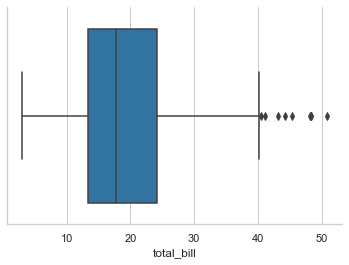

In [9]:
sns.boxplot(x=tips['total_bill'])
sns.despine()
plt.show()

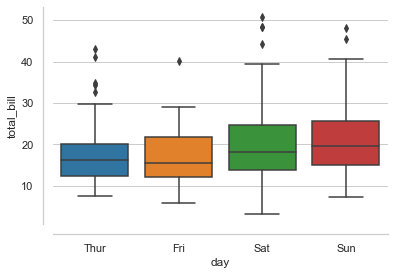

In [10]:
sns.boxplot(x=tips['day'], y=tips['total_bill'])
sns.despine(offset=10) # offset : x축과 y축 사이의 간격 설정
plt.show()

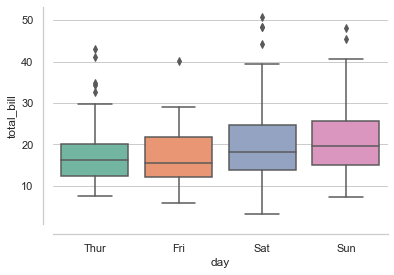

In [11]:
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set2')
sns.despine(right=True, left=False, top=True, bottom=False, offset=10)
plt.show()

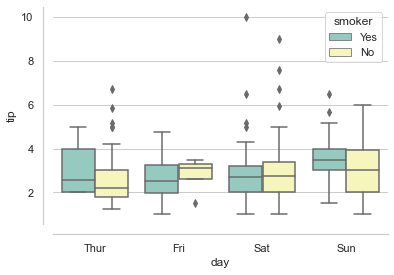

In [12]:
sns.boxplot(x='day', y='tip', hue='smoker', data=tips, palette='Set3') # hue : 카테고리에 따라 그룹을 만들어서 표시
sns.despine(right=True, left=False, top=True, bottom=False, offset=10)
plt.show()

#### Swarm Plot

데이터 포인트 수와 함께 각 데이터의 분포를 제공한다.

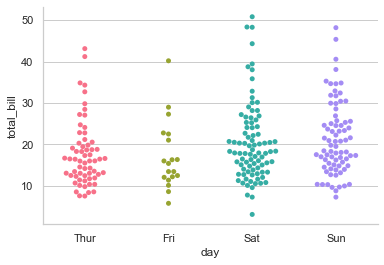

In [13]:
sns.swarmplot(x='day', y='total_bill', data=tips, palette='husl')
sns.despine(right=True, left=False, top=True, bottom=False)
plt.show()

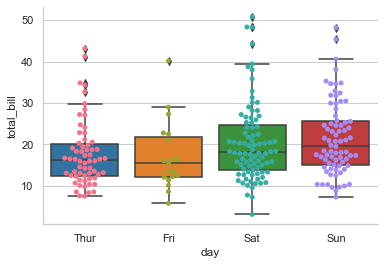

In [14]:
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, palette='husl')
sns.despine(right=True, left=False, top=True, bottom=False)
plt.show()

---

## 📂 Seaborn.Implot()

Scatter 그래프와 회귀선을 함께 출력하는 그래프 함수이다.

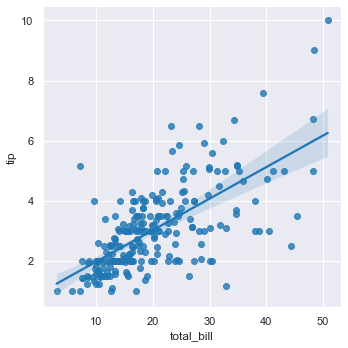

In [15]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill', y='tip', data=tips, height=5) # height : 그래프의 크기
plt.show()

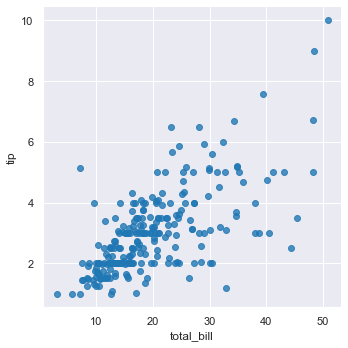

In [16]:
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, height=5) # fit_reg = False : 회귀선 생략
plt.show()

파라미터 col은 카테고리 데이터를 분류하여 그룹화하되 하나의 그래프에 값을 모두 표현한다.<br>
파라미터 col은 카테고리 데이터를 분류하여 그룹화하되 그룹의 개수만큼 그래프를 생성해 표현한다.

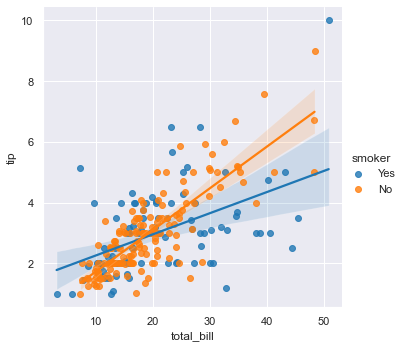

In [17]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, height=5)
plt.show()

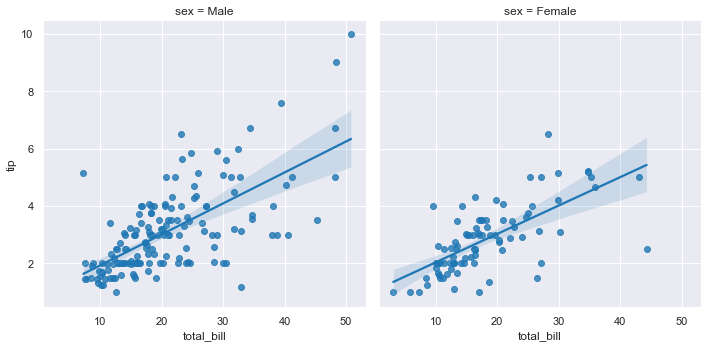

In [18]:
sns.lmplot(x='total_bill',y='tip', col='sex', data=tips, height=5)
plt.show()

---

## 📂 Heatmap 그래프

2차원 수치 데이터를 색으로 표시한다.<br>
두 개의 카테고리에 대한 값 변화를 한 눈에 알기 쉽다.<br>
대용량 데이터 시각화에도 사용성이 높다.

```python
sns.heatmap(heat, → 전처리한 데이터프레임
            annot = True, → 숫자 표시 여부
            ax = ax, → 히트맵을 그릴 격자
            linewidths = 0.4, → 선의 굵기
            linecolor = 'white', → 선의 색깔
            fmt = '.1f', → 소수점 포맷팅 형태
            cmap = 'YlOrRd') → colormap 형태
```

In [19]:
uniform_data = np.random.rand(10,12) # 12개의 난수를 가진 리스트 10개 생성

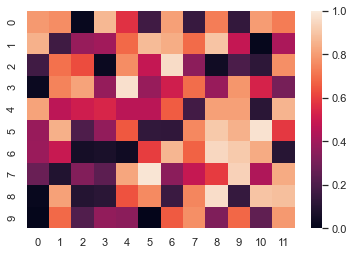

In [20]:
sns.heatmap(uniform_data, vmin=0, vmax=1) # vmin, vmax : 색상 스케일의 최소 · 최대값
plt.show()

#### Heatmap 활용 예제

In [21]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [22]:
flight_p = pd.pivot_table(flights,
                          index='month',
                          columns='year',
                          values='passengers')

flight_p

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


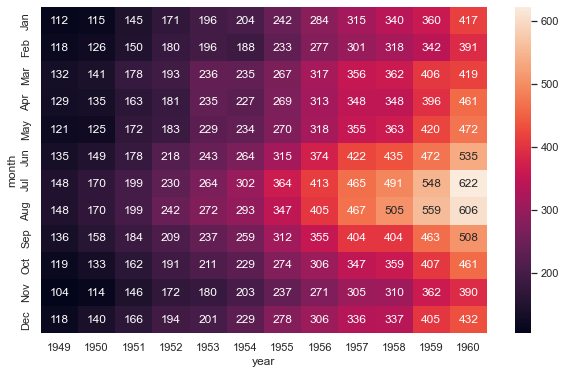

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(flight_p, annot=True, fmt='d')
plt.show()